<a href="https://colab.research.google.com/github/lkamimura/SimulacionDinamica/blob/main/Clase05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)

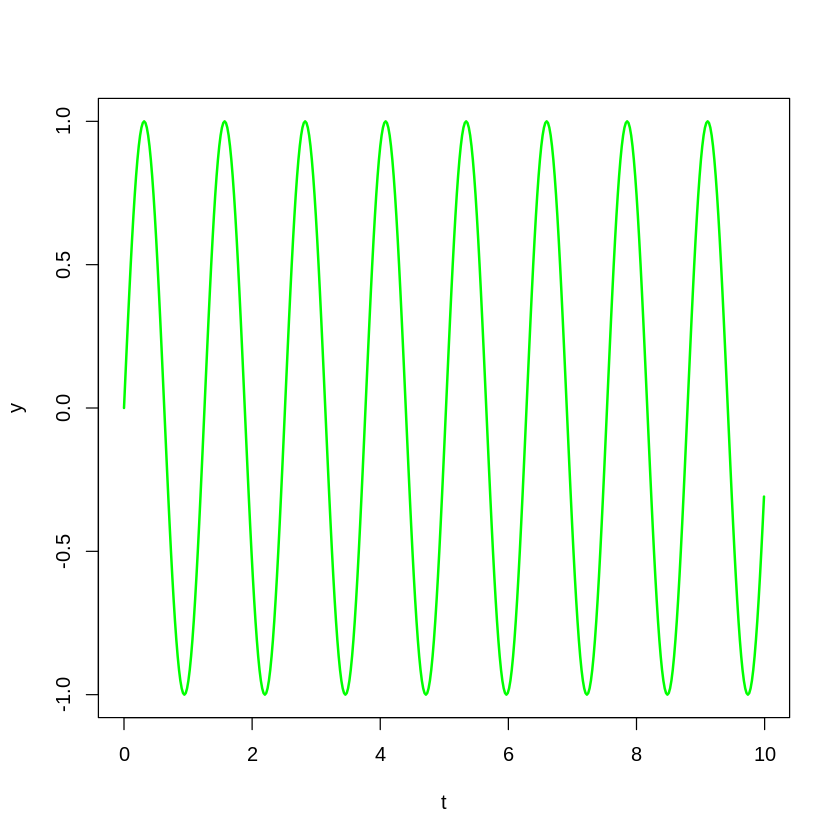

In [2]:
t = seq( 0, 10, by=pi/150) #Generar una secuencia de valores entre 0 y 10 de pasos pi/150
y = sin(5*t) # Obtener la función seno(wt)
plot(t,y, col = "green", type="l", lwd = 2, lty="solid" ) #plotear el resultado con t como absisa y y en la ordenada
#  type="l", lty=2, lwd=3 , lty="dashed"
# line type (lty) can be specified using either text (“blank”, “solid”, “dashed”, “dotted”, “dotdash”, “longdash”, “twodash”)
#  or number (0, 1, 2, 3, 4, 5, 6). Note that lty = “solid” is identical to lty=1.

#Simulacion numerica del Avion

In [30]:
#https://colab.research.google.com/?authuser=1#create=true&language=r
#La linea superior crea el Notebook, el authuser=1 indica el usuario del Chrome, en mi caso, 0 es gmail y 1 es UNC.edu.ar
#R.version.string
#print(installed.packages())
#https://www.datacamp.com/community/tutorials/tutorial-on-loops-in-r
#https://www.datacamp.com/community/tutorials/functions-in-r-a-tutorial
#$ cd "C:\Users\LIMAC\Usr_Julian\HDMIO\Enebro\Usr_Julian\FCEFyN UNC\Extension\2022 01\M1" #No son necesarios en Colab
# $ R #No son necesarios en Colab
#rm(list=ls(all=TRUE)) #es BORRAR todo #No son necesarios en Colab
X = numeric(4)
dim(X) <- c(4,1)
ii=0;t_etapa=1e-3
tF=1e1;
Ts=t_etapa;
At=Ts;
Kmax=(tF/At); #fix() No es necesario en Colab
########################################
X0<-c(0,0,pi,0)
#X0<-c(0,0,-0.01,0)
#X0<-c(0,0,3.2,0)

dim(X0) <- c(4,1)
print("x inicial es")
print(X0)
########################################
#  delta     = x1
#  delta_p   = x2
#  phi       = x3
#  phi_p     = x4
########################################
m=.1; F=0.1; long=0.6;g=9.8;M=.5;
m=.01; F=0.1; long=1.2;g=9.8;M=.5;
#m=.2; F=0.1; long=0.6;g=9.8;M=.5;
#e=zeros(round(tF/t_etapa),1);
#e <- numeric(tF/t_etapa)
#dim(e) <- c(tF/t_etapa,1)
u=0.;
x1 <- numeric(tF/t_etapa) #delta
dim(x1) <- c(tF/t_etapa,1)
x2 <- numeric(tF/t_etapa) #delta_p
dim(x2) <- c(tF/t_etapa,1)
##################################################################
x3 <- numeric(tF/t_etapa)#phi
dim(x3) <- c(tF/t_etapa,1)
x4 <- numeric(tF/t_etapa)#phi_p
dim(x4) <- c(tF/t_etapa,1)
##################################################################
acc <- numeric(tF/t_etapa)
dim(acc) <- c(tF/t_etapa,1)
###################################################################
A    <-c(0,1,0,0,0,-(F/M),-((g*m)/(M)),0,0,0,0,1,0,-((F)/(M*long)),-(g*(M+m))/(M*long),0);
# Mat_A=[0 1 0 0;0 -F/M -m*g/M 0; 0 0 0 1; 0 -F/(long*M) -g*(m+M)/(long*M) 0]
dim(A) <- c(4,4) #print(A)
A<-t(A)
print("La matriz A es")
print(A)
# Mat_B=[0; 1/M; 0; 1/(long*M)]
B<-    c(0,1/M,0,(1/(M*long)))
dim(B) <- c(4,1)#genero matriz 4x1 filaXcolumna
print("La matriz B es")
print(B)
##################################################################
p <- numeric(tF/t_etapa)
dim(p) <- c(tF/t_etapa,1)
p_p <- numeric(tF/t_etapa)
dim(p_p) <- c(tF/t_etapa,1)
phi <- numeric(tF/t_etapa)
dim(phi) <- c(tF/t_etapa,1)
phi_p <- numeric(tF/t_etapa)
dim(phi_p) <- c(tF/t_etapa,1)
tita_pp=0.
p_pp=0.
p[1]=0.
p_p[1]=0.
X[3] = pi -.51 #Si es.1 en 10 seg no se distingue
phi_p[1]=0.
phi[1]=X[3]
for(i in 0:(tF/At)) {
    ii<-ii+1
    x1[ii]<-X[1] # X1 delta
    x2[ii]<-X[2] # X2 delta_p
    x3[ii]<-X[3] # X3 phi
    x4[ii]<-X[4] # X4 phi_p
    xp <- A%*% (X-X0) + B%*% u
    X <- X+xp*At
    acc[ii]<-u
    tita_pp <- (g * sin(phi[ii]) -p_pp * cos(phi[ii])) / long
    p_pp <-(u  - m * long * tita_pp *cos(phi[ii]) + m * long * (phi_p[ii]^2) * sin(phi[ii]) - F * p_p[ii])/(M+m)
    p_p[ii+1] <-   p_p[ii]  +p_pp*At
    p[ii+1] <-     p[ii]    + p_p[ii]*At
    phi_p[ii+1] <- phi_p[ii]+At*tita_pp
    phi[ii+1] <- phi[ii] +At*phi_p[ii]
}
t1<-seq(from=0,to=tF,by=At)  #seq(from, to, by= )
t2<-seq(0,tF+At,At)

[1] "x inicial es"
         [,1]
[1,] 0.000000
[2,] 0.000000
[3,] 3.141593
[4,] 0.000000
[1] "La matriz A es"
     [,1]       [,2]   [,3] [,4]
[1,]    0  1.0000000  0.000    0
[2,]    0 -0.2000000 -0.196    0
[3,]    0  0.0000000  0.000    1
[4,]    0 -0.1666667 -8.330    0
[1] "La matriz B es"
         [,1]
[1,] 0.000000
[2,] 2.000000
[3,] 0.000000
[4,] 1.666667


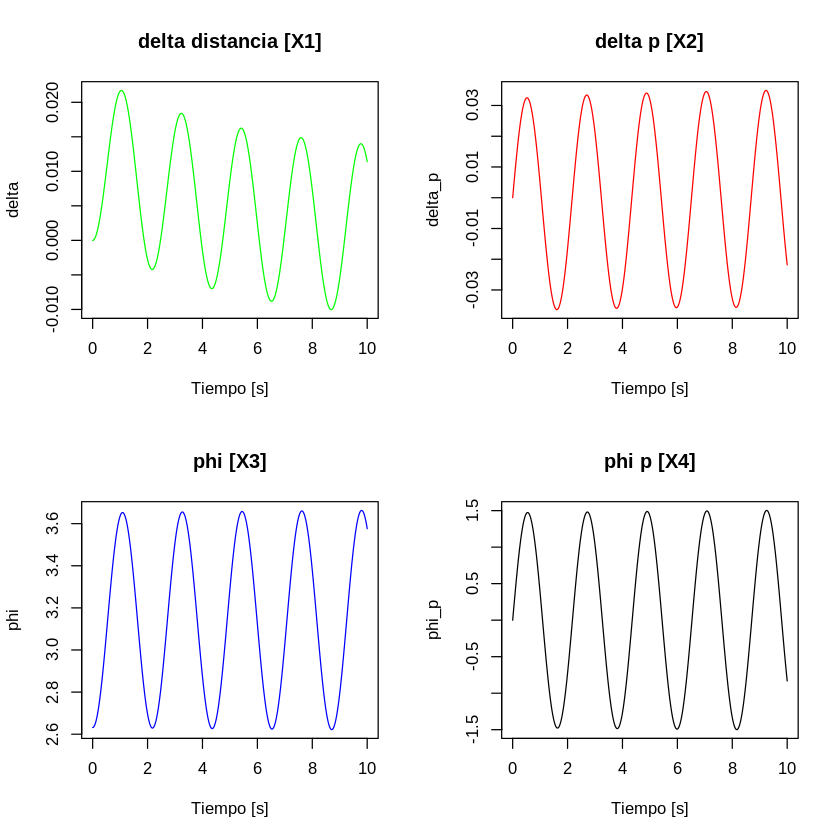

In [31]:
par(mfrow=c(2,2))
plot(xy.coords(t1, x1), type = "s", main="delta distancia [X1]", col = "green", lwd = 1,xlab="Tiempo [s]", ylab="delta")
plot(xy.coords(t1, x2), type = "s", main="delta p [X2]"        , col = "red"  , lwd = 1,xlab="Tiempo [s]", ylab="delta_p")
plot(xy.coords(t1, x3), type = "s", main="phi [X3]"            , col = "blue" , lwd = 1,xlab="Tiempo [s]", ylab="phi")
plot(xy.coords(t1, x4), type = "s", main="phi p [X4]"          , col = "black", lwd = 1,xlab="Tiempo [s]", ylab="phi_p")

In [11]:
Datos_temporales <- data.frame(
  "t" = t1,
  "desplazamiento" = x1,
  "desp_delta"= p[1:length(p)-1],
  "velocidad" = x2,
  "veloc_delta"= p_p[1:length(p)-1],
  "angulo"=x3,
  "phi"=phi[1:length(p)-1],
  "vel_angular"= x4,
  "phi_p"=  phi_p[1:length(p)-1]
)
#head(Datos_temporales,3) #muestra los 5 primeros datos y ssu nombres

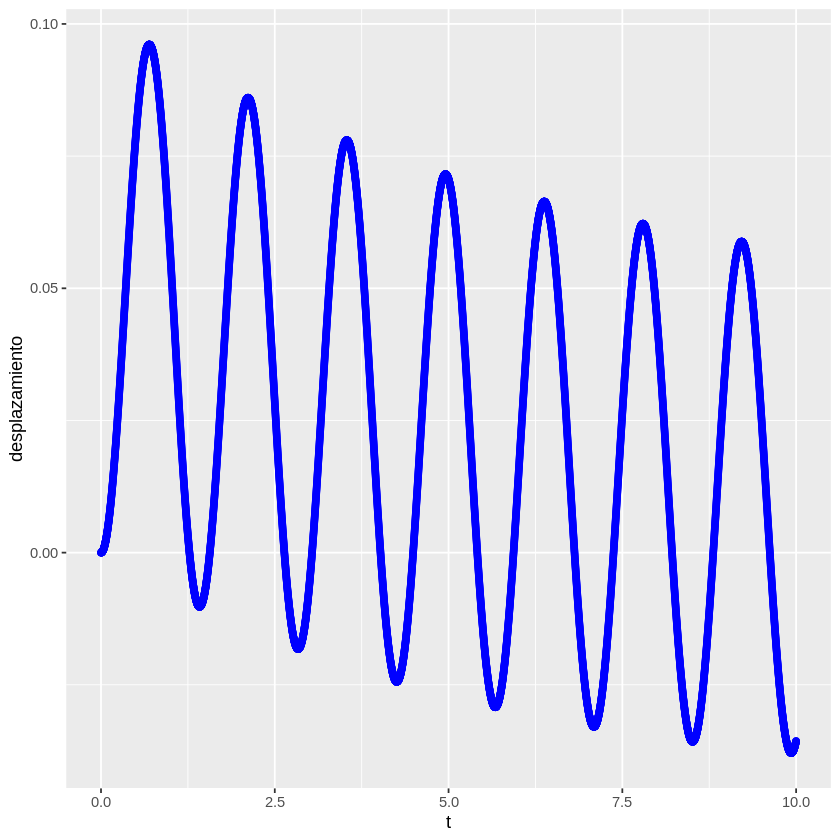

In [14]:
ggplot(Datos_temporales) + geom_point(aes(x=t, y=desplazamiento), col = "blue")

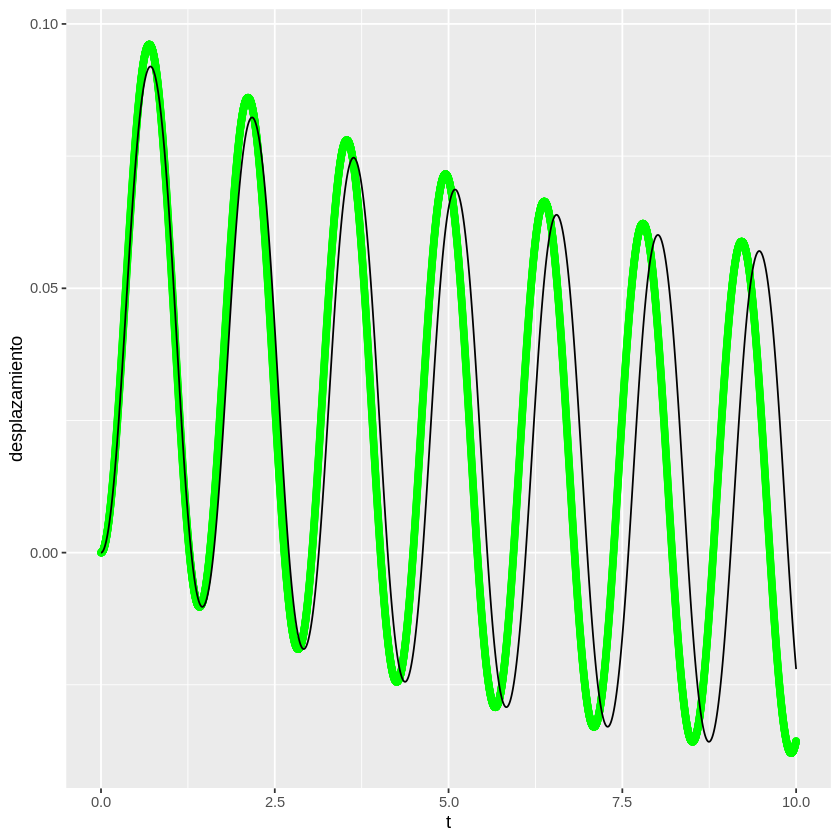

In [13]:
ggplot(Datos_temporales, aes(x=t, y=desplazamiento)) + geom_point(col = "green")+
  geom_line(aes(y = desp_delta))